In [12]:
import numpy as np
import pandas as pd
#from io import StringIO
import os
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
h = 8
w = h*1.61803398875
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 26}

plt.rc('font', **font)

#from matplotlib import rc
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
plt.rc('text', usetex=True)

h = 8
w = 8*1.61803398875

In [13]:
# Data the KB Curve is Based Upon
working_dir = os.path.join(os.path.expanduser("~"), "Documents/github/comprehensive/")
data_path = "2_data/arrival_time/at_all.csv"
filePath = os.path.join(working_dir, data_path)
shot_data = pd.read_csv(filePath)
shot_data.head()

,scaled_distance,arrival_time,reference
0,0.188487,0.007922,"(Goodman, 1960)"
1,0.231975,0.010043,"(Goodman, 1960)"
2,0.279530,0.013067,"(Goodman, 1960)"
3,0.330169,0.014917,"(Goodman, 1960)"
4,0.373853,0.017933,"(Goodman, 1960)"


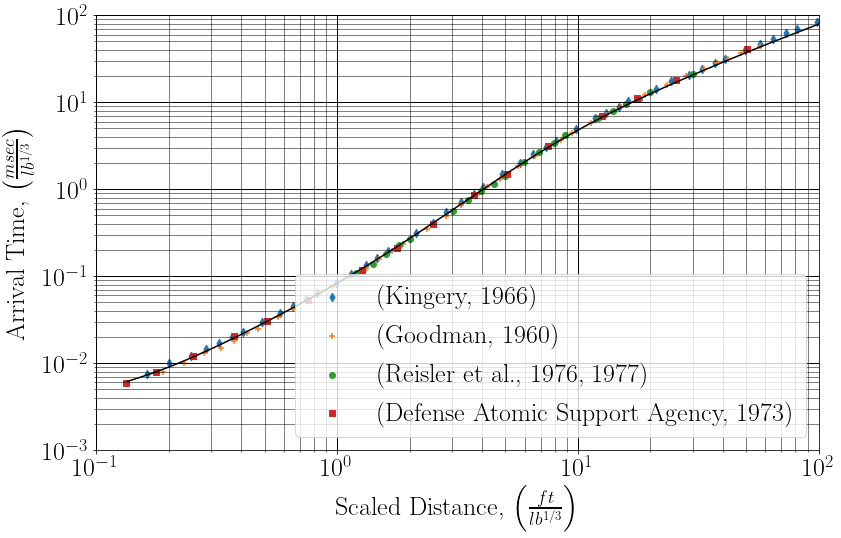

In [14]:
Blast = 'surface'

if Blast == 'freeair':
    T = np.arange(0.134,100.0,0.001)
    TL = np.log10(T)
    U = (-0.80501734056 + 1.37407043777*TL)   
    Y = 10**(- 0.0423733936826 + 1.36456871214000*U
        - 0.0570035692784*U**2 - 0.18283222479600*U**3
        + 0.0118851436014*U**4 + 0.04326486876270*U**5  
        - 0.0007997367834*U**6 - 0.00436073555033*U**7)

else: #surface
    T1 = np.arange(0.170,150,0.001)
    TL1 = np.log10(T1)
    U1 = (-0.755684472698 + 1.37784223635*TL1)   
    Y1 = 10**(- 0.17360760125100*U1**0 + 1.35706496258000*U1**1
              + 0.05249279864500*U1**2 - 0.19656395408600*U1**3
              - 0.06017700522880*U1**4 + 0.06963602708910*U1**5
              + 0.02152974900920*U1**6 - 0.01616589307850*U1**7
              - 0.00232531970294*U1**8 + 0.00147752067524*U1**9)

pltfont = {'fontname':'serif', 'fontsize':'16'}
fig, ax = plt.subplots(figsize=(w, h))

mkr_dict = {'(Kingery, 1966)': 'd',
            '(Goodman, 1960)': '+',
            '(Reisler et al., 1976, 1977)': 'o', 
            '(Defense Atomic Support Agency, 1973)': 's'}
for kind in mkr_dict:
    d = shot_data[shot_data.reference==kind]
    ax.scatter(d.scaled_distance, d.arrival_time,  
                marker = mkr_dict[kind], label=kind)
ax.legend()
x = 0.79
y = 0.75
plt.grid(b=True, which='major', color='black', linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', color='black', linestyle='-', linewidth=.5)
plt.ylim(0.001,100)
plt.xlim(0.100,100)
plt.loglog(T1*x,Y1*y,color='black');
plt.ylabel(r'Arrival Time, $\left(\frac{msec}{lb^{1/3}}\right)$')
plt.xlabel(r'Scaled Distance, $\left(\frac{ft}{lb^{1/3}}\right)$')

#ax.annotate('local max', xy=(3.2, 1.7), xytext=(4.1, 4.1),
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )

data_path = "5_reports/figures"
file_name = "fig_at_data.png"
filePath = os.path.join(working_dir, data_path, file_name)
plt.savefig(filePath)

plt.show()

In [15]:
# 5tn
data_path = "2_data/arrival_time/data_5tn_at.csv"
filePath = os.path.join(working_dir, data_path)
shot_data_5tn = pd.read_csv(filePath)
x_5tn = shot_data_5tn['scaled-distance_metric']
y_5tn = shot_data_5tn['scaled_at_metric']
# 20tn
data_path = "2_data/arrival_time/data_20tn_at.csv"
filePath = os.path.join(working_dir, data_path)
shot_data_20tn = pd.read_csv(filePath)
x_20tn = shot_data_20tn['scaled-distance_metric']
y_20tn = shot_data_20tn['scaled_at_metric']
# 100tn
data_path = "2_data/arrival_time/data_100tn_at.csv"
filePath = os.path.join(working_dir, data_path)
shot_data_100tn = pd.read_csv(filePath)
x_100tn = shot_data_100tn['scaled-distance_metric']
y_100tn = shot_data_100tn['scaled_at_metric']
# 500tn
data_path = "2_data/arrival_time/data_500tn_at.csv"
filePath = os.path.join(working_dir, data_path)
shot_data_500tn = pd.read_csv(filePath)
x_500tn = shot_data_500tn['scaled-distance_metric']
y_500tn = shot_data_500tn['scaled_at_metric']

In [16]:
Blast = 'surface'

if Blast == 'freeair':
    T = np.arange(0.134,100.0,0.001)
    TL = np.log10(T)
    U = (-0.80501734056 + 1.37407043777*TL)   
    Y = 10**(- 0.0423733936826 + 1.36456871214000*U
        - 0.0570035692784*U**2 - 0.18283222479600*U**3
        + 0.0118851436014*U**4 + 0.04326486876270*U**5  
        - 0.0007997367834*U**6 - 0.00436073555033*U**7)

else: #surface
    T1 = np.arange(0.0674,40.001,0.001)
    TL1 = np.log10(T1)
    U1 = (-0.202425716178 + 1.37784223635*TL1)   
    Y1 = 10**(- 0.05916342880460*U1**0 + 1.35706496258000*U1**1
              + 0.05249279864500*U1**2 - 0.19656395408600*U1**3
              - 0.06017700522880*U1**4 + 0.06963602708910*U1**5
              + 0.02152974900920*U1**6 - 0.01616589307850*U1**7
              - 0.00232531970294*U1**8 + 0.00147752067524*U1**9)


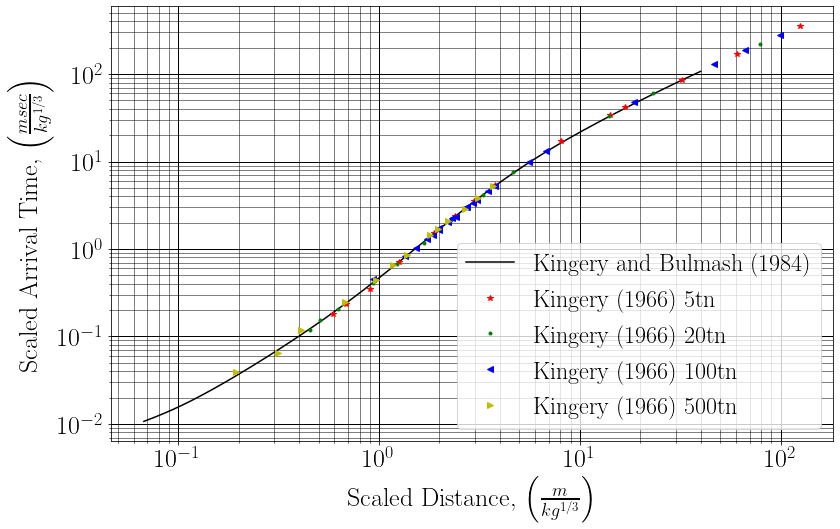

In [20]:
pltfont = {'fontname':'serif', 'fontsize':'16'}
fig, ax = plt.subplots(figsize=(w, h))
plt.grid(b=True, which='major', color='black', linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', color='black', linestyle='-', linewidth=.5)
#plt.ylim(0.001,100)
#plt.xlim(0.100,100)
plt.loglog(T1,Y1,color='black',label='Kingery and Bulmash (1984)');
plt.loglog(x_5tn,y_5tn,'r*',label='Kingery (1966) 5tn');
plt.loglog(x_20tn,y_20tn,'g.',label='Kingery (1966) 20tn');
plt.loglog(x_100tn,y_100tn,'b<',label='Kingery (1966) 100tn');
plt.loglog(x_500tn,y_500tn,'y>',label='Kingery (1966) 500tn');
plt.ylabel(r'Scaled Arrival Time, $\left(\frac{msec}{kg^{1/3}}\right)$')
plt.xlabel(r'Scaled Distance, $\left(\frac{m}{kg^{1/3}}\right)$')
ax.legend(fontsize=24)

data_path = "5_reports/figures"
file_name = "fig_at_tn_data.png"
filePath = os.path.join(working_dir, data_path, file_name)
plt.savefig(filePath)

plt.show()